> **Multi-Objective Reinforcement Learning-based Power Allocation for Optimizing Trade-off Problems in Massive MIMO Systems**
--

> # **Installation of lib**

In [1]:
# conditional install libraries
try:
  import os
  import sys
  import gym
  import pdb
  import math
  import glob
  import time
  import copy
  import torch
  import pylab
  import cmath
  import queue
  import random
  import logging
  import argparse
  import datetime
  import itertools
  import threading
  import collections
  import cvxpy as cp
  import scipy as sp
  import numpy as np
  import pygmo as pg
  import numpy.matlib
  import pandas as pd
  from gym import Env
  import scipy.signal
  import torch.nn as nn
  import scipy.io as sc
  from math import log2
  import scipy.io as sio
  from jax import jacrev
  import jax.numpy as jnp
  from sys import version
  from absl import logging
  from numpy import ndarray
  from scipy import special
  import torch.optim as optim
  from itertools import count
  import scipy.stats as stats
  import multiprocessing as mp
  import statsmodels.api as sm
  from gym.utils import seeding
  from datetime import datetime
  from scipy.constants import *
  from scipy.linalg import sqrtm
  import torch.nn.functional as F
  from collections import Counter
  from scipy.special import erfinv
  from multiprocessing import Pool
  from scipy.integrate import quad
  from scipy.linalg import toeplitz
  from collections import namedtuple
  from scipy.stats import multinomial
  from deap.tools.indicator import hv
  from torch.autograd import Variable
  # from numba import jit, njit, prange
  from numba import njit, prange
  from gym.spaces import Discrete, Box
  from scipy.signal import savgol_filter
  from scipy.interpolate import interp1d
  from collections import deque, Counter
  from gym import Env, error, spaces, utils
  from torchsummary import summary as summary
  from torch.distributions import Categorical
  from scipy.interpolate import make_interp_spline
  from torch.utils.tensorboard import SummaryWriter
  from torchsummary import summary as torch_summary
  from torch.distributions import MultivariateNormal
  from statsmodels.distributions.empirical_distribution import ECDF

  # Set of times noew roman font.
  from matplotlib import cm
  from matplotlib import colors
  import matplotlib.pyplot as plt
  import matplotlib.patches as mpatches
  plt.rcParams['font.family'] = 'serif'
  plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

  np.random.seed(1337) # for reproducibility
  dtype = np.float32

except ModuleNotFoundError:
  if 'google.colab' in str(get_ipython()):
    %pip install numba
    %pip install scipy
    %pip install gym
    %pip install statsmodels
    %pip install cvxpy
    %pip install pytorch
    %pip install pygmo
    %pip install deap
    %pip install torchsummary

import os
import sys
import gym
import pdb
import math
import glob
import time
import copy
import torch
import pylab
import cmath
import queue
import random
import logging
import argparse
import datetime
import itertools
import threading
import collections
import cvxpy as cp
import scipy as sp
import numpy as np
import pygmo as pg
import numpy.matlib
import pandas as pd
from gym import Env
import scipy.signal
import torch.nn as nn
import scipy.io as sc
from math import log2
import scipy.io as sio
from jax import jacrev
import jax.numpy as jnp
from sys import version
from absl import logging
from numpy import ndarray
from scipy import special
import torch.optim as optim
from itertools import count
import scipy.stats as stats
import multiprocessing as mp
import statsmodels.api as sm
from gym.utils import seeding
from datetime import datetime
from scipy.constants import *
from scipy.linalg import sqrtm
import torch.nn.functional as F
from collections import Counter
from scipy.special import erfinv
from multiprocessing import Pool
from scipy.integrate import quad
from scipy.linalg import toeplitz
from collections import namedtuple
from scipy.stats import multinomial
from deap.tools.indicator import hv
from torch.autograd import Variable
# from numba import jit, njit, prange
from numba import njit, prange
from gym.spaces import Discrete, Box
from collections import deque, Counter
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from gym import Env, error, spaces, utils
from torchsummary import summary as summary
from torch.distributions import Categorical
from scipy.interpolate import make_interp_spline
from torch.utils.tensorboard import SummaryWriter
from torchsummary import summary as torch_summary
from torch.distributions import MultivariateNormal
from statsmodels.distributions.empirical_distribution import ECDF

# Set of times new roman font.
from matplotlib import cm
from matplotlib import colors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

np.random.seed(1337) # for reproducibility
dtype = np.float32

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.1 MB/s eta 0:00:00


> # **multi-cell massive MIMO environments (square-cell with wrapped-around)**


In [2]:
class M_MIMOEnv(Env):
  def __init__(self, N, M, K, precoding, Pmin, Pmax, Q):

    # NUMBER OF CELLS, IT IS EQUALS TO NUMBER OF BSs
    self.N = N

    # NUMBER OF BS TRANSMISSION ANTENNAS
    self.M = M

    # NUMBER OF UEs IN A CELL
    self.K = K

    # BANDWIDTH = 20MHz
    self.BW = 20e6

    # POWER OF NOISE FIGURE [dBm] -> (mW)
    self.NF = self.dBm2Watts(7)

    # MINIMUM DOWNLINK POWER [dBm] -> (mW)
    self.Pmin = Pmin

    # MAXIMUM DOWNLINK POWER [dBm] -> (mW)
    self.Pmax = Pmax

    # MINIMUM DOWNLINK POWER [dBm] -> (mW)
    self.min_p = Pmin

    # MAXIMUM DOWNLINK POWER [dBm] -> (mW)
    self.max_p = Pmax

    # NUMBER OF ACTION SPACE
    self.num_p = K

    # TIME SLOT FOR TDD PROTOCOL
    self.slot_t = 20

    # THE PILOT REUSE FACTOR (1 or 4)
    self.pilot_reuse_factor = 4

    # SELECT THE NUMBER OF CHANNEL REALIZATIONS PER SETUP (10 or 100)
    self.nbrOfRealizations = 10

    # TOTAL UPLINK POWER PER UE (mW)
    self.p = 0.1

    # TOTAL DOWNLINK POWER PER UE (mW)
    self.rho = self.dBm2Watts(100)

    # MINIMUM DOWNLINK POWER PER BS (mW)
    self.Pmin = self.dBm2Watts(self.min_p)

    # MAXIMUM DOWNLINK POWER PER BS (mW)
    self.Pmax = self.dBm2Watts(self.max_p)

    # |Q|, QUANTIZATION LEVEL FOR GENERATING DISCRETE ACTION SPACE
    self.Q = Q
    exponents = torch.linspace(0, 1, self.Q-1)
    self.power_values = self.Pmin * (self.Pmax/self.Pmin) ** exponents
    self.power_values = torch.cat([torch.tensor([0.0]), self.power_values])

    # GET RANDOM SEED
    self.seed(123)

   # COMPUTE NOISE POWER
    self.noiseVariancedBm = -174 + 10 * np.log10(self.BW) + self.NF

    # SELECT LENGTH OF COHERENCE BLOCK
    self.tau_c = 200

    # GET RANDOM SEED
    self.seed(123)

    # START THE CHANNEL ESTIMATION
    self.tau_p = self.pilot_reuse_factor * self.K

    # COMPUTE THE PRELOG FACTOR ASSUMING ONLY DOWNLINK TRANSMISSION
    self.prelogFactor = (self.tau_c - self.tau_p) / (self.tau_c)

    # START MULTI-CELL MASSIVE MIMO CHANNEL SETUP
    self.R, self.channel_gain_db = self.channel_stat_setup(self.N, self.K, self.M, no_BS_per_dim=None, asd_degs=[10,], accuracy=2)

    # CUT-OFF THE DIMENSION FOR SHAPING
    self.R = self.R[:, :, :, :, :, 0]
    self.gain = self.channel_gain_db[:, :, 0]

    # COMPUTE THE NORMALIZED AVERAGE CHANNEL GAIN, WHERE THE NORMALIZATION IS BASED ON THE NOISE POWER
    channelGainOverNoise = self.channel_gain_db - self.noiseVariancedBm

    self.H, self.Hhat_MMSE = self.MMSE_channel_estimates(self.R, channelGainOverNoise)

    # CODE FOR GENERATING PRECODING METHODS
    if precoding == 'RZF':
      self.signal, self.interf = self.compute_SINR_DL_rzf_precoding(self.H, self.Hhat_MMSE, self.nbrOfRealizations)

    elif precoding == "MMSE":
      self.signal, self.interf = self.compute_SINR_DL_mmse_precoding(self.H, self.Hhat_MMSE, self.nbrOfRealizations)

    elif precoding == "MRC":
      self.signal, self.interf = self.compute_SINR_DL_mrc(self.H, self.Hhat_MMSE, self.nbrOfRealizations)

    else:
      pass

    # FRACTIONS OF DATA SAMPLES USED FOR UL AND DL
    self.UL_fraction = 1/3
    self.DL_fraction = 2/3

    # POWER ALLOCATION EFFICIENCY UEs AND BSs
    self.mu_UE = 0.4
    self.mu_BS = 0.5

    # ACTION SPACE FOR POWER ALLOCATION
    self.q_action = self.Q_action_sample(sample_size=300)
    self.action_values = self.Action_Space_Mapping(self.q_action)
    self.num_actions = len(self.action_values.keys())
    self.action_space = spaces.Discrete(self.num_actions)

    # OBSERVATION SPACE FOR MULTI-OBJECTIVE REINFORCEMENT LEARNING
    """
    observation_space[0], average channel gain {t}
    observation_space[1], average downlink user-rate {t}
    observation_space[2], power consumption {t}
    """
    MO_obs_lower = np.array([-(np.finfo(np.float32).max), 0, 0], dtype=np.float32)
    MO_obs_upper = np.array([np.finfo(np.float32).max, np.finfo(np.float32).max, np.finfo(np.float32).max], dtype=np.float32)
    self.MO_observation_space = spaces.Box(MO_obs_lower, MO_obs_upper, dtype = np.float32)

    # OBSERVATION SAPCE FOR SINGLE-OBJECTIVE REINFORCEMENT LEARNING
    SO_obs_lower = np.array([0, 0], dtype=np.float32)
    SO_obs_upper = np.array([np.finfo(np.float32).max, np.finfo(np.float32).max], dtype=np.float32)
    self.SO_observation_space = spaces.Box(SO_obs_lower, SO_obs_upper, dtype = np.float32)

    # MULTI-OBJECTIVES REWARD SPECIFICATION
    """
    reward_space[0], spectral efficiency with conditional penalty, and discount factor
    reward_space[1], energy efficiency with conditional penalty, and discount factor
    """
    self.reward_space = spaces.Box(low = -np.finfo(np.float32).max, high = np.finfo(np.float32).max, shape=(2,), dtype = np.float32)
    self.objective_space = [1, 2]
    self.preference_space = np.arange(0.0, 1.00, 0.1)

    # INITIALIZE SETP COUNTER
    self.count = 0

    # INITALIZE CURRENT OBS(STATE) ELEMENTS
    self.spectral_effieicny = 0
    self.energy_effieicny = 0
    self.power_consumption = 0

    self.seed(123)

  def seed(self, seed = None):
    self.np_random, seed = seeding.np_random(seed)
    return [seed]

  # Q-VALUE BASED ACTION GENERATION
  def Q_action_sample(self, sample_size):
    returns = []
    sample_size = min(sample_size, self.Q - 1)
    step_size = max(1, self.Q // sample_size)
    for i in range(0, self.Q, step_size):
      actions = torch.full((self.K, self.N), i)
      rho = self.power_values[actions]

      # Flatten the matrix to a 1D tuple and append to returns
      returns.append(tuple(rho.numpy().flatten()))

    return returns

  # ACTION MAPPING INTO DICTONARY INDEX
  def Action_Space_Mapping(self, returns):
    action_key_list = list(np.arange(len(returns)))
    action_values = dict(zip(action_key_list, returns))
    return action_values

  # GET MODE OPTIMAL POWER (RHO) FUNCTION
  def Get_rho(self, index):
    if len(index) == 0:
      return 0
    else:
      c = Counter(index)
      mode = c.most_common(1)
      return mode[0][0]

  # CONVERT dBm to Watts
  def dBm2Watts(self, dbm):
    watt = 10 ** ((dbm - 30) / 10)
    return watt

  # CONVERT Watts to dBm
  def Watts2dBm(self, watt):
    dbm = 10 * math.log10(watt * 1000)
    return dbm

  def step(self, action, objective):
    err_msg = "%r (%s) invalid" % (action, type(action))
    assert self.action_space.contains(action), err_msg

    # CONVERTING THE PARETO FRONT SET FROM THE PREDICTED OTPIMAL DOWNLINK POWER INDEX
    action = np.array(self.action_values[action]).reshape(self.K, self.N)
    self.obs_channel_gain = np.mean(self.gain.flatten())

    # COMPUTE THE SPECTRAL EFFIEICNY [Mbit/s/Hz/cell]
    SE = self.computeSE_DL_poweralloc(action, self.signal, self.interf)

    # COMPUTE THE SPECTRAL EFFICIENCY [Mbit/s/Hz/cell]
    self.obs_user_rate = np.mean(SE.flatten())
    self.spectral_effieicny = np.sum(SE)

    # COMPUTE THE POWER CONSUMPTION OF STATIC AND DYNAMIC PARTS.
    CP = self.compute_CP(Table = 1, SE = SE.sum())
    PC = np.sum(action) + CP.sum()
    self.obs_power_consumption = PC.sum()

    # COMPUTE THE ENERGY EFFICIENCY [Mbit/Joule/cell]
    EE = self.computeEE(SE, CP, action)
    self.energy_effieicny = EE.sum()

    if objective == "multiple":
      obs = np.array([self.obs_channel_gain, self.obs_user_rate, self.obs_power_consumption])
      reward = np.zeros(2, dtype = np.float32)
      reward[0] = self.spectral_effieicny
      reward[1] = self.energy_effieicny

    elif objective == "single_SE":
      obs = np.array([self.obs_channel_gain, self.obs_user_rate])
      reward = self.spectral_effieicny

    elif objective == "single_EE":
      obs = np.array([self.obs_power_consumption, self.energy_effieicny])
      reward = self.energy_effieicny

    else:
      pass

    # REDUCE THE ACTIO SIZE FOR CHECKING THE STEP CONDITION
    self.action_length -= 1
    self.count += 1
    if self.action_length <= 0:
      done = True
    else :
      done = False
    info = {}

    return obs, reward, done, info

  # MASSIVE MIMO RESET FUNCTION
  def reset(self, objective):
    self.action_length = self.num_actions

    # INITIALIZE STEP COUNTER
    self.count = 0

    # INITALIZE CURRENT OBS(STATE) ELEMENTS
    self.spectral_effieicny = 0
    self.energy_effieicny = 0
    self.power_consumption = 0

    # INITAILZE THE OBSERVATION SPACE ELEMENTS
    self.obs_channel_gain = np.zeros((self.K, self.N), dtype = np.float32)
    self.obs_user_rate = np.zeros((self.K, self.N), dtype = np.float32)
    self.obs_power_consumption = np.zeros((self.K, self.N), dtype = np.float32)

    # CONVERTING THE OBSERVATION SHAPE
    self.obs_channel_gain = np.mean(self.obs_channel_gain.flatten())
    self.obs_user_rate = np.mean(self.obs_user_rate.flatten())
    self.obs_power_consumption = np.mean(self.obs_power_consumption.flatten())

    if objective == "multiple":
      # INITAILZE THE OBSERVATION SPACE
      obs = np.array([self.obs_channel_gain, self.obs_user_rate, self.obs_power_consumption], dtype = np.float32)

    elif objective == "single_SE":
      # INITAILZE THE OBSERVATION SPACE
      obs = np.array([self.obs_channel_gain, self.obs_user_rate], dtype = np.float32)

    elif objective == "single_EE":
      # INITAILZE THE OBSERVATION SPACE
      obs = np.array([self.obs_power_consumption, self.energy_effieicny], dtype = np.float32)

    return obs

  # CLOSE THE MASSIVE MIMO ENV
  def close(self):
    return

  # DRAW THE MASSWIVE MIMO ENV
  def render(self):
    pass

  # PROBABILITY DENSITY FUNCTION (PDF) : GAUSSIAN
  @njit
  def gaussian_pdf(self, x, mean, dev):
    return np.exp(-(x-mean) ** 2 / (2 * dev ** 2)) / (np.sqrt(2 * np.pi) * dev)

  # CORRELATION FUNCTION
  @njit
  def corr(self, x, theta, asd, antenna_spacing, dist, col, real_imag):
    if real_imag == 0:
        res = np.cos(2 * np.pi * antenna_spacing * col * np.sin(x))
    else:
        res = np.sin(2 * np.pi * antenna_spacing * col * np.sin(x))
    if dist =='gaussian':
        res *= self.gaussian_pdf(x, theta, asd)
    return res

  # LOCAL SCATTERING CHANNEL MODEL, WHERE THE LOCAL IS A SIGNLE CELL IN THE TOTAL CELL
  def R_local_scattering(self, M, theta, asd_deg, antenna_spacing=0.5, dist='Gaussian', accuracy=2, dtype=complex):
    # IN RADIANS
    asd = asd_deg * np.pi / 180

    # CORRELATION MATRIX IS TOEPLITZ STRUCTURE, SO ONLY NEED FIRST ROW
    first_row = np.zeros([M,], dtype=dtype)

    if accuracy == 1:
        lb = None
        ub = None

        dist = dist.lower()
        if dist == 'gaussian':
            lb = theta - 20 * asd
            ub = theta + 20 * asd

        else:
            raise NotImplementedError

        for col in range(0, M):
            # DISTANCE FROM THE FIRST ANTENNA
            c_real:float = quad(func=self.corr, a=lb, b=ub, args=(theta, asd, antenna_spacing, dist, col, 0))[0]
            c_imag:float = quad(func=self.corr, a=lb, b=ub, args=(theta, asd, antenna_spacing, dist, col, 1))[0]

            first_row[col] = complex(c_real, c_imag)
    elif accuracy == 2:
        # GAUSSIAN DISTRIBUTION
        distance = np.arange(M)
        x1 = np.exp(1j * 2 * np.pi * antenna_spacing * np.sin(theta) * distance)
        x2 = np.exp(-asd ** 2 / 2 * (2 * np.pi * antenna_spacing * np.cos(theta) * distance) ** 2)
        first_row = x1 * x2

    return toeplitz(c=first_row.conjugate())

  # CHANNEL STATISTICS BETWEEN UE's AT RANDOM LOCATIONS AND THE BS
  def channel_stat_setup(self, N, K, M, asd_degs, no_BS_per_dim=None, accuracy=2,):
    # SQURE SIDE, IN METERS
    side_length = 250

    # EXPRESSION OF PATHLOSS
    alpha = 3.76

    # AVERAGE CHANNEL GAIN IN dB AT THE REF. DISTANCE 1 METER. AT EXPONET SET TO 3.76, AT 1KM IT's -148.1 dB
    constant_term = -35.3

    # STANDARD DEVIATION OF SHADOW FADING
    sigma_sf = 1

    # MINIMUM DISTANCE BETWEEN BS AND UEs
    min_UE_BS_dist = 35

    # ANTENNA SPACING OF WEVELENGTHS
    antenna_spacing = 0.5
    if no_BS_per_dim is None:
        no_BS_per_dim = np.array([np.sqrt(N), np.sqrt(N)])
    inter_bs_distance = side_length / no_BS_per_dim

    # SCATTER THE BSs
    BS_positions = np.stack(np.meshgrid(np.arange(inter_bs_distance[0]/2, side_length, inter_bs_distance[0]),np.arange(inter_bs_distance[1]/2, side_length, inter_bs_distance[1]),indexing='ij'),axis=2).reshape([-1,2])

    # WRAPPING IN THE OTHER BS LOCATIONS
    wrap_locations = np.stack(np.meshgrid(np.array([-side_length, 0, side_length]), np.array([-side_length, 0, side_length]), indexing='ij' ), axis=2).reshape([-1,2])
    BS_positions_wrapped = np.expand_dims(BS_positions, axis=1) + wrap_locations
    UEpositions = np.zeros([K, N, 2])
    perBS = np.zeros([N,], dtype=int)

    # NORMALIZED SPATIAL CORRELATION MATRICES
    R = np.zeros([M, M, K, N, N, len(asd_degs)], dtype=complex)

    # PREPARE TO SAVE AVERAGE CHANNEL GAIN NUMBER (IN dB)
    self.channel_gain = np.zeros([K, N, N])

    # GO THROUGH ALL THE CELLS
    for i in range(N):
        # PUT THE K UEs IN THE CELL, UNIFORMLY. UE's NOT SATISFYING THE MINIMUM DISTANCE ARE REPLACED
        res = []
        while perBS[i] < K:
            UEremaining = K - perBS[i]
            pos = np.random.uniform(-inter_bs_distance/2, inter_bs_distance/2,size=(UEremaining, 2))
            cond = np.linalg.norm(pos, ord=2, axis=1) >= min_UE_BS_dist

            # SATISFYING MINIMUM DISTANCE WITH RESPECT TO BS SHAPE
            pos = pos[cond, :]
            for x in pos:
                res.append(x + BS_positions[i])
            perBS[i] += pos.shape[0]
        UEpositions[:, i, :] = np.array(res)

        # LOOP THROUGH ALL BS FOR CROSS-CHANNELS
        for j in range(N):
            # DISTANCE BETWEEN ALL UEs in cell i to BS j, CONSIDERING WRAP-AROUND
            dist_ue_i_j = np.linalg.norm(np.expand_dims(UEpositions[:, i], axis=1) - BS_positions_wrapped[j, :, :], axis=2)
            dist_bs_j = np.min(dist_ue_i_j, axis=1)
            which_pos = np.argmin(dist_ue_i_j, axis=1)

            # AVERAGE CHANNEL GAIN WITH LARGE-SCALE FADING MODEL IN (2.3), NEGLECTING SHADOW FADING
            self.channel_gain[:, i, j] = constant_term - alpha * 10 * np.log10(dist_bs_j)

            # GENERATE SPATIAL CORRELATION MATRICES FOR CHANNEL WITH LOCAL SCATTERING MODEL
            for k in range(K):
                vec_ue_bs = UEpositions[k, i] - BS_positions_wrapped[j, which_pos[k]]
                angle_BS_j = np.arctan2(vec_ue_bs[1], vec_ue_bs[0])

                for spr, asd_deg in enumerate(asd_degs):
                  R[:, :, k, i, j, spr] = self.R_local_scattering(M, angle_BS_j, asd_deg, antenna_spacing, accuracy=accuracy)

        # GO THROUGH ALL UEs IN CELL l AND GENERATE SHADOW FADING REALIZATIONS
        for k in range(K):
            # SEE IF ANOTHER BS HAS A LARGE AVERAGE CHANNEL GAIN TO THE UE than BS i
            while True:
                # GENERATE NEW SHADOW FADING REALIZATIONS UNTIL ALL UE's IN CELL I HAS ITS LARGEST AVERAGE CHANNEL GAIN FROM BS i
                shadowing = sigma_sf * np.random.randn(N)
                channel_gain_shadowing = self.channel_gain[k, i] + shadowing
                if channel_gain_shadowing[i] >= np.max(channel_gain_shadowing):
                    break
            self.channel_gain[k,i,:] = channel_gain_shadowing
    self.UEpositions = UEpositions
    return R, self.channel_gain

  # MMASE CHANNEL ESTIMATION
  def MMSE_channel_estimates(self, R, channel_gain_db):
    # GENERATE UNCORRELATED RAYLEIGH FADING CHANNEL REALIZATIONS
    H = (np.random.randn(self.M, self.nbrOfRealizations, self.K, self.N, self.N) + 1j * np.random.randn(self.M, self.nbrOfRealizations, self.K, self.N, self.N))

    # PREPARE A MATRIX TO SAVE THE CHANNEL GAINS PER UE
    betas = np.zeros((self.K, self.N, self.N))
    R_gain = np.zeros(R.shape, dtype=complex)

    # GO THROUGH ALL CHANNELS AND APPLY THE CHANNEL GAINS TO THE SPATIAL CORRELATION MATRICES
    for j in range(self.N):
        for l in range(self.N):
            for k in range(self.K):
                if channel_gain_db[k, j, l] > -np.inf:
                    # EXTRACT CHANNEL GAIN IN LINEAR SCALE
                    betas[k, j, l] = 10 ** (channel_gain_db[k, j, l] / 10)
                    R_gain[:, :, k, j, l] = betas[k, j, l] * R[:, :, k, j, l]

                    # APPLY CORRELATION TO THE UNCORRELATED CHANNEL REALIZATIONS
                    Rsqrt = sp.linalg.sqrtm(R_gain[:, :, k, j, l])
                    H[:, :, k, j, l] = np.sqrt(0.5) * Rsqrt @ H[:, :, k, j, l]
                else:
                    betas[k, j, l] = 0
                    R_gain[:, :, k, j, l] = 0
                    H[:, :, k, j, l] = 0

    # PILOT REUSE PATTERNS, ONLY WORK WHEN THERE ARE 16 BS
    if self.pilot_reuse_factor == 1:
        pilot_pattern = np.zeros((self.N,))
    elif self.pilot_reuse_factor == 2:
        pilot_pattern = np.kron(np.ones((2,)), np.array([0, 1, 0, 1, 1, 0, 1, 0]))
    elif self.pilot_reuse_factor == 4:
        pilot_pattern = np.kron(np.ones((2,)), np.array([0, 1, 0, 1, 2, 3, 2, 3]))
    elif self.pilot_reuse_factor == 16:
        # pilot_pattern = np.arange(self.N)
        pilot_pattern = np.zeros((self.N,))
    else:
        raise NotImplementedError('Unknown f')

    # REALIZATIONS OF NORMALIZED NOISE
    Np = np.sqrt(0.5) * (np.random.randn(self.M, self.nbrOfRealizations, self.K, self.N, self.pilot_reuse_factor) + 1j * np.random.randn(self.M, self.nbrOfRealizations, self.K, self.N, self.pilot_reuse_factor))

    # PREPARE TO MMSE CHANNEL ESTIMATION
    Hhat_MMSE = np.zeros((self.M, self.nbrOfRealizations, self.K, self.N, self.N), dtype=complex)

    # GO THROUGH ALL CELLS
    for j in range(self.N):
        for g in range(self.pilot_reuse_factor):
            # EXTRACT THE CELLS THAT BELONG TO PILOT GROUP g
            group_members = np.nonzero(g == pilot_pattern)[0]

            # COMPUTE PROCESSED PILOT SIGNAL FOR ALL UEs THAT USE THESE PILOTS, ACCORDING TO (3.5)
            yp = np.sqrt(self.p) * self.tau_p * np.sum(H[:, :, :, group_members, j], axis=3) + np.sqrt(self.tau_p) * Np[:, :, :, j, g]

            for k in range(self.K):
                # COMPUTE THE MATRIX THAT IS INVERTED IN THE MMSE ESTIMATOR, WHERE THE np.eye(self.M) FOR STORE IDENTITY MATRIX OF SIZE M x M
                PsiInv = self.p * self.tau_p * np.sum(R_gain[:, :, k, group_members, j], axis=2) + np.eye(self.M)

                for l in group_members:
                    # MMSE (MINIMUM MEAN-SQUARE ESTIMATION) ESTIMATION METHOD
                    RPsi = np.linalg.solve(PsiInv.conjugate().transpose(), R_gain[:, :, k, l, j]).conjugate().transpose()
                    Hhat_MMSE[:, :, k, l, j] = np.sqrt(self.p) * RPsi @ yp[:, :, k]

    return H, Hhat_MMSE

  # COMPUTE SINR WITH RZF PRECODING VECTOR
  def compute_SINR_DL_rzf_precoding(self, H, Hhat, nbrOfRealizations):

    # SAVE IDENTITY MATICES OF DIFFERENT SIZES
    eyeK = np.eye(self.K)

    # PREPARE TO SAVE SIMULATION RESULTS FOR SIGNAL GAINS
    signal_RZF = np.zeros((self.K, self.N), dtype=complex)

    # PREPARE TO SAVE SIMULATION RESUTLS FOR Bernoulli_extra_interference powers
    interf_RZF = np.zeros((self.K, self.N, self.K, self.N))

    # GO THROUGH ALL CHANNEL REALIZATIONS
    for n in range(nbrOfRealizations):
      # GO THROUGH ALL CELLS
      for j in range(self.N):
        # EXTRACT CHANNEL REALIZATIONS FROM ALL UEs to BS j
        Hallj = np.reshape(H[:,n,:,:,j], (self.M, self.K * self.N), 'F')

        # EXTRACT CHANNEL REALIZATIONS FROM ALL UEs to BS j
        Hhatallj = np.reshape(Hhat[:,n,:,:,j], (self.M, self.K * self.N), 'F')

        # COMPUTE MR COMBINING IN (4.11)
        V_MR = Hhatallj[:, self.K * j:self.K * (j + 1)]

        # COMPUTE RZF COBINING IN (4.9)
        temp = self.p*np.matmul(np.matrix(V_MR).getH(), V_MR) + eyeK
        temp = np.linalg.inv(temp)
        V_RZF = np.matmul(self.p * V_MR, temp)

        for k in range(self.K):
          if np.linalg.norm(V_MR[:,k])>0:

            # EXTRACT PRECODING VECTOR
            w = V_RZF[:,k]/np.linalg.norm(V_RZF[:,k])

            # HERMITIAN : MAKE IT A ROW VECTOR AND CONJUGATE
            w = np.reshape(w, (1,self.M)).conj()

            # COMPTUE REALIZATIONS OF THE TERMS INSIDE THE EXPECTAIONS OF THE SIGNAL AND Bernoulli_extra_interference TERMS OF (7.2) AND (7.3)
            h_temp = H[:,n,k,j,j]
            signal_RZF[k,j] = signal_RZF[k,j] + (np.inner(w,h_temp))/nbrOfRealizations
            h_temp = np.matmul(w,Hallj)
            h_temp = np.abs(np.array(h_temp))**2
            h_temp = np.reshape(h_temp, (self.K, self.N), 'F')

            interf_RZF[k,j,:,:] = interf_RZF[k,j,:,:] + h_temp/nbrOfRealizations

    # COMPUTE THE TERMS IN (7.2)
    signal_RZF = np.abs(signal_RZF)**2

    # COMPUTE THE TERMS IN (7.3)
    for j in range(self.N):
      for k in range(self.K):
        interf_RZF[k,j,k,j] = interf_RZF[k,j,k,j] - signal_RZF[k,j]

    return signal_RZF, interf_RZF

  # COMPUTE DOWNLINK MMSE PRECODING VECTOR
  def compute_SINR_DL_mmse_precoding(self, H, Hhat, nbrOfRealizations):
    eyeK = np.eye(self.K)
    signal_MMSE = np.zeros((self.K, self.N), dtype=complex)
    interf_MMSE = np.zeros((self.K, self.N, self.K, self.N))

    for n in range(nbrOfRealizations):
        for j in range(self.N):
            Hallj = np.reshape(H[:, n, :, :, j], (self.M, self.K * self.N), 'F')
            Hhatallj = np.reshape(Hhat[:, n, :, :, j], (self.M, self.K * self.N), 'F')
            V_MR = Hhatallj[:, self.K * j:self.K * (j + 1)]

            R = np.matmul(Hallj, Hallj.conj().transpose()) / nbrOfRealizations
            V, D, _ = np.linalg.svd(R)
            V = V[:, :self.K]
            D = D[:self.K]
            V_MMSE = np.matmul(V[:, :self.K], np.linalg.inv(eyeK + np.diag(D)))

            for k in range(self.K):
                if np.linalg.norm(V_MR[:, k]) > 0:
                    w = V_MMSE[:, k] / np.linalg.norm(V_MMSE[:, k])
                    w = np.reshape(w, (1, self.M)).conj()

                    h_temp = H[:, n, k, j, j]
                    signal_MMSE[k, j] += (np.inner(w, h_temp)) / nbrOfRealizations

                    h_temp = np.matmul(w, Hallj)
                    h_temp = np.abs(np.array(h_temp)) ** 2
                    h_temp = np.reshape(h_temp, (self.K, self.N), 'F')
                    interf_MMSE[k, j, :, :] += h_temp / nbrOfRealizations

    signal_MMSE = np.abs(signal_MMSE) ** 2

    for j in range(self.N):
        for k in range(self.K):
            interf_MMSE[k, j, k, j] = np.sum(interf_MMSE[k, j, :, :]) - signal_MMSE[k, j]

    return signal_MMSE, interf_MMSE

  # COMPUTE DOWNLINK MRC PRECODING VECTOR
  def compute_SINR_DL_mrc(self, H, Hhat, nbrOfRealizations):
    eyeK = np.eye(self.K)
    signal_MRC = np.zeros((self.K, self.N), dtype=complex)
    interf_MRC = np.zeros((self.K, self.N, self.K, self.N))

    for n in range(nbrOfRealizations):
      for j in range(self.N):
        Hallj = np.reshape(H[:,n,:,:,j], (self.M, self.K * self.N), 'F')
        Hhatallj = np.reshape(Hhat[:,n,:,:,j], (self.M, self.K * self.N), 'F')
        V_MF = Hhatallj[:, self.K * j:self.K * (j + 1)].conj()

        for k in range(self.K):
          if np.linalg.norm(V_MF[:,k]) > 0:
            w = V_MF[:,k]/np.linalg.norm(V_MF[:,k])
            w = np.reshape(w, (1, self.M)).conj()

            h_temp = H[:,n,k,j,j]
            signal_MRC[k,j] = signal_MRC[k,j] + (np.inner(w,h_temp))/nbrOfRealizations
            h_temp = np.matmul(w, Hallj)
            h_temp = np.abs(np.array(h_temp))**2
            h_temp = np.reshape(h_temp, (self.K, self.N), 'F')

            interf_MRC[k,j,:,:] = interf_MRC[k,j,:,:] + h_temp/nbrOfRealizations
    signal_MRC = np.abs(signal_MRC)**2

    for j in range(self.N):
      for k in range(self.K):
        interf_MRC[k,j,k,j] = interf_MRC[k,j,k,j] - signal_MRC[k,j]

    return signal_MRC, interf_MRC

  # COMPUTE SPECTRAL EFFIIENCY IN DOWNLINK SCENARIO WITH ALLOCATED POWER
  def computeSE_DL_poweralloc(self, rho, signal, interference):

    # PREPARE TO SVAE RESULTS
    SINR = np.zeros((self.K, self.N))
    SE = np.zeros((self.K,self.N))

    # GO THROUGH ALL CELLS
    for j in range(self.N):
      for k in range(self.K):
        SINR[k,j] = (rho[k,j]*signal[k,j]) / (sum(sum(rho * interference[:,:,k,j])) + 1)
        SE[k,j] = self.prelogFactor * np.log2(1 + SINR[k,j])


    return np.mean(np.sum(SE, axis = 1))

  # COMPUTE SPECTRAL EFFIIENCY IN DOWNLINK SCENARIO WITH ALLOCATED POWER
  def dinkelbach_convex_computeSE_DL_poweralloc(self, rho, signal, interference):

    # PREPARE TO SVAE RESULTS
    SINR = np.zeros((self.K, self.N))
    SE = np.zeros((self.K,self.N))

    # GO THROUGH ALL CELLS
    for j in range(self.N):
      for k in range(self.K):
        SINR[k,j] = (rho[k,j]*signal[k,j]) / (sum(sum(rho * interference[:,:,k,j])) + 1)
        SE[k,j] = self.prelogFactor * np.log2(1 + SINR[k,j])

        # SE[k,j] = self.BW * self.prelogFactor * np.log2(1 + SINR[k,j])
        # SE[k,j] = self.BW * np.log2(1 + SINR[k,j])

    return SE

  # CIRCUIT POWER CONSUMPTION SET OF BS (STATICAL PART OF BS POWER CONSUMPTION)
  def CPmodel(self, Table = 1):
    # DEFINE PARAMETER VALUES FOR VALUESET1
    if Table == 1:
      # FIXED CIRCUIT POWER PER BS (in Watt)
      p_fix = 10

      # CIRCUIT POWER PER LO (in Watt)
      p_lo = 0.2

      # CIRCUIT POWER PER BS ANTENNA (in Watt)
      p_bs = 0.4

      # CIRCUIT POWER PER UE (in Watt)
      p_ue = 0.2

      # CIRCUIT POWER FOR ENCODING
      p_cod = 0.1 * 10 ** (- 9)

      # CIRCUIT POWER FOR DECODING
      p_dec = 0.8 * 10 ** (- 9)

      # BS COMPUTATIONAL EFFIEICNY
      l_bs = 75 * 10 ** 9

      # CIRCUIT POWER FOR BACKHAUL
      p_bt = 0.25 * 10 ** (- 9)

    # DEFINE PARAMETER VALUES FOR VALUESET2
    elif Table == 2:
      # FIXED CIRCUIT POWER PER BS (in Watt)
      p_fix = 5

      # CIRCUIT POWER PER LO (in Watt)
      p_lo = 0.1

      # CIRCUIT POWER PER BS ANTENNA (in Watt)
      p_bs = 0.2

      # CIRCUIT POWER PER UE (in Watt)
      p_ue = 0.1

      # CIRCUIT POWER FOR ENCODING
      p_cod = 0.01 * 10 ** (-9)

      # CIRCUIT POWER FOR DECODING
      p_dec = 0.08 * 10 ** (-9)

      # BS COMPUTATIONAL EFFIEICNY
      l_bs = 750 * 10 ** 9

      # CIRCUIT POWER FOR BACKHAUL
      p_bt = 0.025 * 10 ** (-9)

    else:
      pass

    return p_fix, p_lo, p_bs, p_ue, p_cod, p_dec, l_bs, p_bt

  # THIS METHOD IS USED FOR THE CP PER THE NUMBER OF ANTNENAS IN THE POWER ALLOCATION METHODS OR CP PER THE ACTUAL SCENARIO
  def compute_CP(self, Table = 1, SE = 0.0):

    # OBTAIN CP MODEL COEFFICIENTS FOR ON OF THE VALUESET IN TABLE 5.3
    p_fix, p_lo, p_bs, p_ue, p_cod, p_dec, l_bs, p_bt = self.CPmodel(Table = Table)

    p_tc = np.zeros((self.M, 1))
    p_ce = np.zeros((self.M, 1))
    p_sp_rt = np.zeros((self.M, 1))
    p_sp_dl = np.zeros((self.M, 1))
    p_rzf = np.zeros((self.M, 1))
    p_sp_ul_rzf = np.zeros((self.M, 1))

    p_cd_rzf = (p_cod + p_dec) * self.BW * np.sum(SE)
    p_bh_rzf = p_bt * self.BW * np.sum(SE)

    for m in range(self.M):
      # COMPUTE CIRCUIT POWER FOR TRANSCEIVER CHAINS USING (5.34)
      p_tc[m] = m * p_bs + p_lo + self.K * p_ue

      # COMPUTE CIRCUIT POWER FOR CHANNEL ESTIMATION WITH ALL OTHER METHODS, WHERE ONLY THE CHANNELS TO UEs IN OTHER CELLS ARE ESTIMATED, USING (5.37)
      p_ce[m] = 3 * self.K * self.BW / (self.tau_c * l_bs) * (m * self.tau_p + m ** 2)

      # COMPUTE CIRCUIT POWER FOR UL RECEPTION AND DL TRANSMISSION
      p_sp_rt[m] = (self.tau_c - self.tau_p) * 3 * self.BW / (self.tau_c * l_bs) * m * self.K

      # COMPUTE CIRCUIT POWER FOR COMPUTATION OF PRECODING VECTORS
      p_sp_dl[m] = 4 * m * self.K * self.BW / (self.tau_c * l_bs)

      # SUM-UP THE POWER TERMS THAT ARE INDEPENDENT OF THE PROCESSING METHOD
      p_same = p_fix + p_tc[m] + p_sp_rt[m] + p_sp_dl[m]

      # COMPUTE CIRCUIT POWER FOR COMPUTATION OF COMBINING VECTORS WITH DIFFERENT METHODS, BASED ON TABLE 5.2
      p_sp_ul_rzf[m] = 3 * self.BW * (3 * self.K ** 2 * m / 2 + 3 * m * self.K / 2 + (self.K ** 3 - self.K) / 3 + (7 / 3) * self.K) / (self.tau_c * l_bs)

      # COMPUTE POWER CONSUMPTION IN CIRCUIT POWER CONSUMPTION MODEL IN MULTI-CELL MASSIVE MIMO, IT REFERENCE FROM THE MASSIVE MIMO BOOK
      p_rzf[m] = p_same + p_ce[m] + p_cd_rzf + p_bh_rzf + p_sp_ul_rzf[m]

    # AS THE NUMBER OF ANTENNAS INCREASES, THE CP IS SET TO INCREASE EQUALLY
    CP = p_rzf

    return CP

  # COMPUTE THE TOTAL CELLULAR ENERGY EFFICIENCY [bit/Joule]
  def computeEE(self, SE, CP, PA):

    # COMPUTE TOTAL EFFIEICTIVE TRAMSIT POWER
    ETP_total = self.K * self.p * (self.tau_p / self.mu_UE + (self.tau_c - self.tau_p) * (self.UL_fraction / self.mu_UE + self.DL_fraction / self.mu_BS)) / self.tau_c
    EE = (self.BW * np.sum(SE)) / (ETP_total + np.sum(PA) + np.sum(CP)) / 1e5

    # EE = np.sum(SE) / (ETP_total + np.sum(PA) + np.sum(CP)) / 1e5
    # EE = np.sum(SE) / (ETP_total + np.sum(PA) + np.sum(CP))

    return np.sum(EE)

  # DEEP REINFORCEMENT LEARNING PREDICTED ACTION-BASED COMPUTE SE, AND EE
  def DRL_compute(self, rho, signal, interf, table = 1):

    # COMPUTE THE SPECTRAL EFFIEICNY [Mbit/s/Hz/cell]
    SE = self.computeSE_DL_poweralloc(rho, signal, interf)

    # COMPUTE THE CIRCUIT POWER CONSUMPTION WITH STATIC, AND DYNAMIC PARTS
    CP = self.compute_CP(Table = table, SE = SE.sum())
    PC = np.sum(rho) + CP.sum()

    # COMPUTE THE ENERGY EFFIEICNY [Mbit/Joule/cell]
    EE = self.computeEE(SE, CP, rho)

    return rho, SE, EE, PC

#####################################################################################################################################
  # EQUAL POWER ALLOCATION METHOD (CONVENTIONAL)
  def equal_PA(self, signal, interf, table = 1):

    # COMPUTE DOWNLINK POWER PER UE IN CASE OF EQUAL POWER ALLOCATION
    rho = (((self.Pmax + self.Pmin) / 2)/ (self.K * self.N) * np.ones((self.K, self.N)))

    # COMPUTE THE SPECTRAL EFFIEICNY [Mbit/s/Hz/cell]
    SE = self.computeSE_DL_poweralloc(rho, signal, interf)

    # COMPUTE THE CIRCUIT POWER CONSUMPTION WITH STATIC, AND DYNAMIC PARTS
    CP = self.compute_CP(Table = table, SE = SE.sum())
    PC = np.sum(rho) + CP.sum()

    # COMPUTE THE ENERGY EFFIEICNY [Mbit/Joule/cell]
    EE = self.computeEE(SE, CP, rho)

    return rho, SE, EE, PC
#####################################################################################################################################

#####################################################################################################################################
  # RANDOMLY POWER ALLOCATION (CONVENTIONAL)
  def random_PA(self, signal, interf, table = 1):

    # COMPUTE DOWNLINK POWER PER UE IN CASE OF RANDOM POWER ALLOCATION
    rho = np.random.uniform(self.Pmin, self.Pmax, size = (self.K, self.N))

    # COMPUTE THE SPECTRAL EFFIEICNY [Mbit/s/Hz/cell]
    SE = self.computeSE_DL_poweralloc(rho, signal, interf)

    # COMPUTE THE CIRCUIT POWER CONSUMPTION WITH STATIC, AND DYNAMIC PARTS
    CP = self.compute_CP(Table = table, SE = SE.sum())
    PC = np.sum(rho) + CP.sum()

    # COMPUTE THE ENERGY EFFIEICNY [Mbit/Joule/cell]
    EE = self.computeEE(SE, CP, rho)

    return rho, SE, EE, PC
#####################################################################################################################################

#####################################################################################################################################
  # MAXIMUM POWER ALLOCATION (CONVENTIONAL)
  def max_PA(self, signal, interf, table = 1):

    # COMPUTE DOWNLINK POWER PER UE IN CASE OF MAXIMUM POWER ALLOCATION
    rho = self.Pmax * np.ones((self.K, self.N))

    # COMPUTE THE SPECTRAL EFFIEICNY [Mbit/s/Hz/cell]
    SE = self.computeSE_DL_poweralloc(rho, signal, interf)

    # COMPUTE THE CIRCUIT POWER CONSUMPTION WITH STATIC, AND DYNAMIC PARTS
    CP = self.compute_CP(Table = table, SE = SE.sum())
    PC = np.sum(rho) + CP.sum()

    # COMPUTE THE ENERGY EFFIEICNY [Mbit/Joule/cell]
    EE = self.computeEE(SE, CP, rho)

    return rho, SE, EE, PC
#####################################################################################################################################

#####################################################################################################################################
  # MAX-MIN POWER ALLOCATION (CVXPY)
  def maxmin_PA(self, signal, interf, table = 1):

    # COPY FROM THE INPUT SIGNAL AND INTERFERNECE
    maxmin_signal = signal.copy()
    maxmin_interf = interf.copy()

    # CHECK WITH UEs THAT HAVE NON-ZERO CHANNELS, BECUASE THESE ONES ARE EXLUDED
    nonzero = np.reshape(signal, tuple(np.array([self.K * self.N,1])), order="F")
    nonzero = nonzero[nonzero > 0]

    # INITALIZED THE GAMMA-VARIABLES IN ALGORITHM1
    rateLower = 0
    rateUpper = np.log2(1 + self.Pmax * np.min(nonzero))

    # SET THE ACCURACY OF THE BISECTION
    delta = 0.01

    # PREPARE TO SAVE THE POWER SOLUTION
    rho = np.zeros((self.K, self.N))

    # SOLVE THE MAX-MIN PROBLEM BY BISECTION
    # - INTERATIVE UNTIL THE DIFFERENCE BETWEEN THE LOWER AND UPPER POINTS IN TER INTERVAL IS SMALLER THAN DELTA
    while np.linalg.norm(rateUpper - rateLower) > delta:

      # COMPUTE THE MID-POINT OF THE LINE
      # NOTE THAT WE ARE PERFORMING THE BISECTION IN THE SE DOMAIN INSTEAD OF THE SINR DOMAIN AS ALGORITHM1, SINCE WE CAN THEN SEPCFIC DELTA AS THE SE DIFFERENCE
      rateCandidate = (rateLower + rateUpper) / 2

      # TRANSMFORM THE MID-POINTS INTO SINR REQUIREMENTS
      gammaCandidate = 2.0 ** (rateCandidate) - 1

      # SOLVE THE FESIBILITY PROBLEM USING CVXPY
      feasible, rhoSolution = self.maxmin_cvx(signal, interf, gammaCandidate)

      # IF THE PROBLEM WAS FEASIBLE, THEN REPLACE RATELOWER WITH GAMMACANDIDATE AND SAVE RHOSOLUTION AS THE NUEW BEST POWER SOLUTION
      # COMPUTE DOWNLINK POWER PER UE IN CASE OF MAX-MIN POWER ALLOCATION
      if feasible:
        rateLower = rateCandidate
        rho = rhoSolution
      # IF THE PROBLEM WAS NOT FEASIBLE, THEN REPLACE REATEPOINT WITH GAMMACANDIDATE
      else:
        rateUpper = rateCandidate

    # COMPUTE THE SPECTRAL EFFIEICNY [Mbit/s/Hz/cell]
    SE = self.computeSE_DL_poweralloc(rho, maxmin_signal, maxmin_interf)

    # COMPUTE THE CIRCUIT POWER CONSUMPTION WITH STATIC, AND DYNAMIC PARTS
    CP = self.compute_CP(Table = table, SE = SE.sum())
    PC = np.sum(rho) + CP.sum()

    # COMPUTE THE ENERGY EFFIEICNY [Mbit/Joule/cell]
    EE = self.computeEE(SE, CP, rho)

    return rho, SE, EE, PC

  def maxmin_cvx(self, signal, interf, gammaCandidate):

    # VARIABLE FOR THE K x L POWER ALLOCATION MATRIX
    rho_p = cp.Variable((self.K, self.N), pos = True)

    # SCALING PARAMETER FOR POWER CONSTRAINTS
    scaling = cp.Variable(pos = True)

    # CREATE CONSTRAINTS
    constraints = []

    # OBJECTIVE
    obj = cp.Minimize(scaling)

    for j in range(self.N):
      for k in range(self.K):
        if (signal[k,j] > 0):
          constraints.append(gammaCandidate * (cp.sum(cp.sum(rho_p.T @ interf[:,:,k,j])) + 1) - (rho_p[k,j] * signal[k,j]) <= 0)
        constraints.append(rho_p[k,j] >= 0)
      constraints.append(cp.sum(rho_p[:,j]) <= scaling * self.Pmax)
    constraints.append(scaling >= 0)

    # MINIZE THE POWER INDIRECTLY BY SCAING THE POWER CONSTRAINTS
    prob = cp.Problem(obj, constraints)
    prob.solve()

    # BOTH THE POWER MINIMIZATION PROBLEM AND THE FEASIBLITY PROBLEM ARE INFESAIBLE
    if prob.status == 'infeasible':
      feasible = False
      rhoSolution = np.full((self.K, self.N), self.Pmax / (self.K * self.N))

    # ONLY THE POWER MINIMIZATION PROBLEM IS FEASBILE
    elif prob.value > 1:
      feasible = False
      rhoSolution = rho_p

    # BOTH THE POWER MINIMIZATION PROBLEM AND FEASILIBTY PROBLEMA RE FEASBILE
    else:
      feasible = True
      rhoSolution = rho_p

    rhoSolution = np.array(rho_p.value)

    return feasible, rhoSolution
#####################################################################################################################################

#####################################################################################################################################
  # MAXIMUM PRODUCT SINR POWER ALLOCATION (CVXPY)
  def maxprod_PA(self, signal, interf, table = 1):

    # COMPY FORM THE INPUT SIGNAL AND INTERFERENCE
    maxprod_signal = signal.copy()
    maxprod_interf = interf.copy()

    # CHECK WITH UEs THAT HAVE NON-ZERO CHANNELS, BECAYSE THESE ONES ARE EXCLUDED
    nonzero = np.reshape(signal, tuple(np.array([self.K * self.N, 1])), order = 'F')
    nonzero = nonzero[nonzero > 0]

    # INITIALIZED THE GAMM-VARIABLE IN ALGORITHM2
    rateLower = 0
    rateUpper = np.log(1 + self.Watts2dBm(self.Pmax) * np.min(nonzero))

    # SET THE ACCURACY OF THE BISECTION
    delta = 0.01

    # PREPARE TO SAVE THE POWER SOLUTION
    rho_p = np.zeros((self.K, self.N))

    while np.linalg.norm(rateUpper - rateLower) > delta:
      # COMPUTE THE MIN-POINT OF THE LINE
      rateCandidate = (rateLower + rateUpper) / 2

      # TRASFORM THE MID-POINTS INTO SINR REQUIREMENTS
      gammaCandidate = 2.0 ** (rateCandidate) - 1

      # SOLVE THE FEASIBLILITY PROBLEM USING CVXPY
      feasible, rhoSolution = self.maxprod_cvx(signal, interf, gammaCandidate)

      # IF THE PROIBLEMS WAS FEASIBLE, THEN REPLCAE REATELOWER WITH GAMMCANDIDATE AND SAVE RHOSOLUTION AS NEW BEST SOLUTION
      # COMPUTE DOWNLINK POWER PER UE IN CASE OF MAXPROD SINR POWER ALLOCATION
      if feasible:
        rateLower = rateCandidate
        rho_p = rhoSolution
      # IF THE PROBLE WAS NOT FEASIBLE, THEN REPLACE REATEPOINT WITH GAMMACANDIDATE
      else:
        rateUpper = rateCandidate

    # COMPUTE THE SPECTRAL EFFIEICNY [Mbit/s/Hz/cell]
    SE = self.computeSE_DL_poweralloc(rho_p, maxprod_signal, maxprod_interf)

    # COMPUTE THE CIRCUIT POWER CONSUMPTION WITH STATIC, AND DYNAMIC PARTS
    CP = self.compute_CP(Table = table, SE = SE.sum())
    PC = np.sum(rho_p) + CP.sum()

    # COMPUTE THE ENERGY EFFIEICNY [Mbit/Joule/cell]
    EE = self.computeEE(SE, CP, rho_p)


    return rho_p, SE, EE, PC

  def maxprod_cvx(self, signal, interf, gammaCandidate):

    # VARIABLE FOR THE K x L POWER ALLOCATION MATRIX
    rho_p = cp.Variable((self.K, self.N), pos = True)

    # CREATE CONSTRAINTS
    constraints = []

    for j in range(self.N):
      for k in range(self.K):
        if signal[k,j] > 0:
          # OBJECTIVE
          obj = cp.Maximize(gammaCandidate * rho_p[k,j])

          # SINR CONTRAINTS OF UE k IN CELL j
          constraints.append(gammaCandidate * (cp.sum(cp.sum(rho_p.T @ interf[:,:,k,j])) + 1) <= (rho_p[k,j] * signal[k,j]))
          constraints.append(rho_p[k,j] >= 0)
        else:
          # THIS APPLIES IF UE k IN CELL j IS INACTIVE
          gammaCandidate = 1
          constraints.append(rho_p[k,j] >= 0)
      constraints.append(rho_p[k,j] <= self.Pmax)

    # MAXMIZING THE SINR BY GAMMACANDIDATE THE POWER CONSTRAINTS
    prob = cp.Problem(obj, constraints)
    prob.solve()

    # BOTH THE POWER AMXIMIZATION PROBLEM AND THE FEASBILITY PROBLEM ARE INFESEABLE
    if prob.status == 'infeasible':
      feasible = False
      # THE BELOW CODE IS THE CAUSE OF THE ERROR. THEREFORE, IT ALLOCATES WITH THE COMPUTED POWER
      # rhoSolution = []
      rhoSolution = np.zeros((self.K, self.N))

    # ONLY THE CALCUATION OF POWER PROBLEM IS FEASIBLE
    elif prob.value > 1:
      feasible = False
      rhoSolution = rho_p

    # BOTH THE SINR MAXIMIZATION PROBLEM AND FEASIBLITY PROBLEM ARE FEASIBLE
    else:
      feasible = True
      rhoSolution = rho_p

    rhoSolution = np.array(rho_p.value)

    return feasible, rhoSolution
#####################################################################################################################################


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



> # **Gobal hyperparameter for DRL and MORL models**

In [12]:
###############################################################################
# FOR SE-DQN, EE-DQN MODEL
only_learning_rate = 1e-3
only_max_train = 1000
only_gamma = 0.98
only_batch_size = 64
only_buffer_size = 50000
###############################################################################

###############################################################################
# PQL MODEL
pql_learning_rate = 1e-3
pql_max_train = 1000
pql_gamma = 0.98
pql_batch_size = 64
pql_buffer_size = 100000
###############################################################################

# MODEL LEARNING RATE
learning_rate = 1e-3

# NUMBER OF STEPS BEFORE NETWORK UPDATE
update_interval = 10

# NUMBER OF THE MODEL SAVING INTERVAL
save_interval = 10

# MAXIMUM EPISODES FOR TRAINING FOR EACH MODEL
###############################################################################
# original task for paper results
max_train = 1000
###############################################################################

# MAXIMUM EPISODES FOR VALIDATION FOR EACH MODEL
###############################################################################
# original task for paper results
max_validation = 1000
###############################################################################

# MAXIMUM EPISODES FOR TEST FOR EACH MODEL
max_test = 3

# DISCOUNT FACTOR {0.2, 0.4, 0.6, 0.8, 0.98}
gamma = 0.98

# DISCOUNT FACTOR LIST {0.2, 0.4, 0.6, 0.8, 0.98}
gamma_list = [0.2, 0.4, 0.6, 0.8, 0.98]

# REPLACE THE RUMTIME STAMPING
run_timestamp = datetime.now().ctime().replace(" ", "_")

# THE SETTING OF THE BACTH SIZE
batch_size = 64

# MAXIMUM REPLAY BUFFER FOR DQN-BASED APPROACHES
buffer_size = 50000

# ABOUT EPSILON SETTING FOR EACH DQN-BASED APPROACHES
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01

# SETTING OF OPTIMIZER FOR EACH DQN-BASED APPROACHES
optimizer_types = ["ADAM", "SGD", "RMSProp", "Adagrad"]

# FOR PARETO OPTIMAL-POINT APPROXIMATION METHOD
update_types = ['Q-learning', "Pareto"]

# NUMBER OF PROPOSED MOA3C LOCAL-AGENTS
max_training_agents = 16
local_agents_list = [4, 8, 16]

# ENTROPY COEFFIENCT FOR MORE EXPLORATION ON THE MULTI-CELL MASSIVE MIMO NETOWKR (PROPOSED MOA3C)
###############################################################################
# {0.1, 0.01} for multi-cell massive MIMO network
# entropy_coef = 0.06

# {0.1, 0.01} from google deepmind paper
entropy_coef = 0.01
###############################################################################

# FOR PROPOSED MOA3C, PREFERENCE INITIALIZE STEP
weights_types = ["random", "division"]

# FOR PROPOSED MOA3C, REWARD AGGREGATION METHODS
reward_types = ["combination", "partition"]

# FOR PROPOSED MOA3C, THE NUMBER OF PREFERENCE WEIGHTS RANGE
goal_size = 10
goal_partition = 10

# RANDOM SEED IN 5G MASSIVE MIMO ENV
seed = 1

def exp_preference_update(initial_weights, t, alpha_SE, alpha_EE):
  """
  Updates the preference weights for spectral efficiency (SE) and energy efficiency (EE)   based on the initial weights and the current timestep.
  It uses an exponential decay function to decrease the weights over time.
  """
  # Apply the "exp" based preference updating technique
  SE_weight = initial_weights[0] * np.exp(-alpha_SE * t)
  EE_weight = initial_weights[1] * np.exp(-alpha_EE * t)

  return SE_weight, EE_weight

def Bayesian_preference(prior_weights, SE, EE, preference_space):
  """
  Calculates the Bayesian preference weights for spectral efficiency (SE) and energy efficiency (EE)   based on the prior weights and the cumulative reward signals from each local agent.
  It uses Bayes' rule to update the prior probabilities based on the evidence.
  """
  # Define the prior probabilities of each goal being more important than the other
  prior_a_b = prior_weights

  # Cumulative reward signals from the each local-agent (type of list or array)
  freq_efficiency = SE
  energy_efficiency = EE

  # Observing all of the preference weights space (type of list)
  preference_weights = preference_space

  try:
    # Calculate the likelihood of the data given the preference weights (likelihoods of the evidence given each hypothesis)
    spectral_likelihood = np.mean(np.power(np.abs(freq_efficiency), preference_weights) * np.power(np.abs(energy_efficiency), 1 - preference_weights))
    energy_likelihood = np.mean(np.power(np.abs(energy_efficiency), preference_weights) * np.power(np.abs(freq_efficiency), 1 - preference_weights))

    # Apply Bayes' rule to update the prior probabilities based on the evidence
    posterior_a_b = np.array([prior_a_b[0]*spectral_likelihood, prior_a_b[1]*energy_likelihood])
    posterior_a_b /= np.sum(posterior_a_b)

    # Calculate the probability that SE is more important than EE
    SE_weight = posterior_a_b[0]

    # Calculate the probability that EE is more important than SE
    EE_weight = posterior_a_b[1]

  # if we can't calcuate likelihood of each objective reward signals
  except RuntimeWarning:
    print("Warning: Unable to calculate likelihood. Setting prior preference weights.")
    SE_weight = prior_weights[0]
    EE_weight = prior_weights[1]

  return SE_weight, EE_weight

class ReplayBuffer:
  def __init__(self, capacity):
    self.capacity = capacity
    self.buffer = []

  def push(self, state, action, next_state, reward, done):
    if len(self.buffer) >= self.capacity:
      self.buffer.pop(0)
    self.buffer.append((state, action, next_state, reward, done))

  def sample(self, batch_size):
    return random.sample(self.buffer, batch_size)

  def __len__(self):
    return len(self.buffer)

def save_MOA3C_checkpoint(global_model, filename):
  torch.save(global_model.state_dict(), filename)

def load_MOA3C_checkpoint(global_model, checkpoint):
  print("================================================================================================")
  print("                                     < LOADING THE CHECKPOINTS >                                ")
  print("================================================================================================\n")
  global_model.load_state_dict(checkpoint)
  global_model.eval()

###############################################################################################################
################################################# END OF UTILS ################################################

class MOA3C_ActorCritic(nn.Module):
  """
  Defines the architecture of the Actor-Critic model used in the Multi-Objective Asynchronous Advantage Actor-Critics (MO-A3Cs) algorithm.
  It includes methods for calculating the policy (`pi`) and multiple-value (`v`) of a given state.
  """
  def __init__(self, state_size, action_size, num_critics):
    super(MOA3C_ActorCritic, self).__init__()

    self.state_size = state_size
    self.action_size = action_size
    self.hidden_size = 128
    self.num_critics = num_critics

    self.fc1 = nn.Linear(self.state_size, self.hidden_size)      # (state_dim, hidden_dim)
    self.fc2 = nn.Linear(self.hidden_size, self.hidden_size)
    self.fc3 = nn.Linear(self.hidden_size, self.hidden_size)
    self.fc_pi = nn.Linear(self.hidden_size, self.action_size)   # (hidden_dim, action_dim)
    self.fc_v = nn.ModuleList([nn.Linear(self.hidden_size, 1) for _ in range(self.num_critics)]) # (hidden_dim, 1) for each critic

  def pi(self, x, softmax_dim=0):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc_pi(x)

    prob = F.softmax(x, dim=softmax_dim)
    return prob

  def v(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    v = [fc_v(x) for fc_v in self.fc_v] # get value from each critic
    return v

> # **P-DQN (Pareto Front Apprixmation based Deep Q-network)**

<ipython-input-2-45097fce7dce>:533: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  signal_RZF[k,j] = signal_RZF[k,j] + (np.inner(w,h_temp))/nbrOfRealizations


[PQL] Episode [1] 		 vector scores [6.1670829264322915, 6.63487060546875]
[PQL] Episode [2] 		 vector scores [6.100675862630208, 6.733707682291667]
[PQL] Episode [3] 		 vector scores [6.111453043619791, 6.66273681640625]
[PQL] Episode [4] 		 vector scores [6.176280517578125, 6.757232259114583]
[PQL] Episode [5] 		 vector scores [6.150558268229167, 6.676999918619791]
[PQL] Episode [6] 		 vector scores [6.15896484375, 6.89533203125]
[PQL] Episode [7] 		 vector scores [6.052350667317708, 6.6835945638020835]
[PQL] Episode [8] 		 vector scores [6.119407145182292, 7.094365234375]
[PQL] Episode [9] 		 vector scores [6.005182291666666, 6.771190185546875]
[PQL] Episode [10] 		 vector scores [6.03091552734375, 6.93593994140625]
[PQL] Episode [11] 		 vector scores [5.877662353515625, 6.799014892578125]
[PQL] Episode [12] 		 vector scores [6.15447509765625, 6.904769694010417]
[PQL] Episode [13] 		 vector scores [6.1724462890625, 7.004580078125]
[PQL] Episode [14] 		 vector scores [5.72926513671875

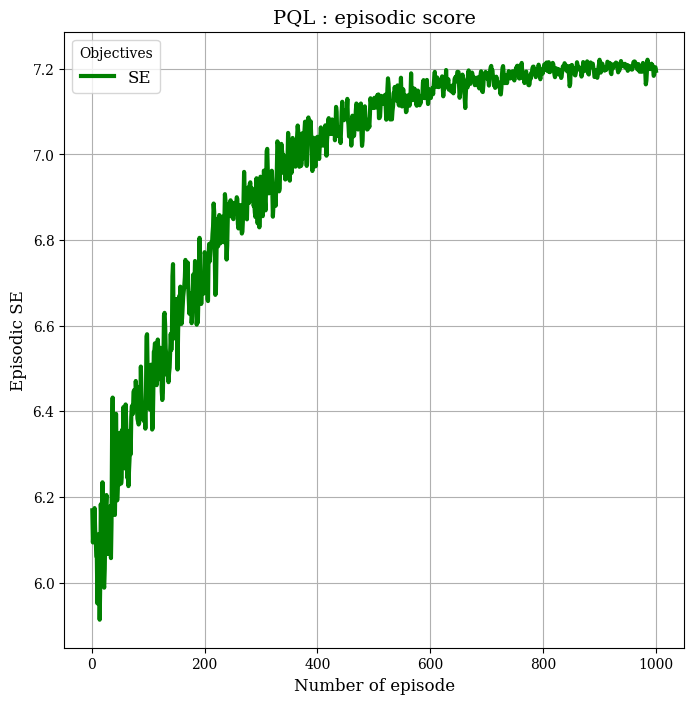

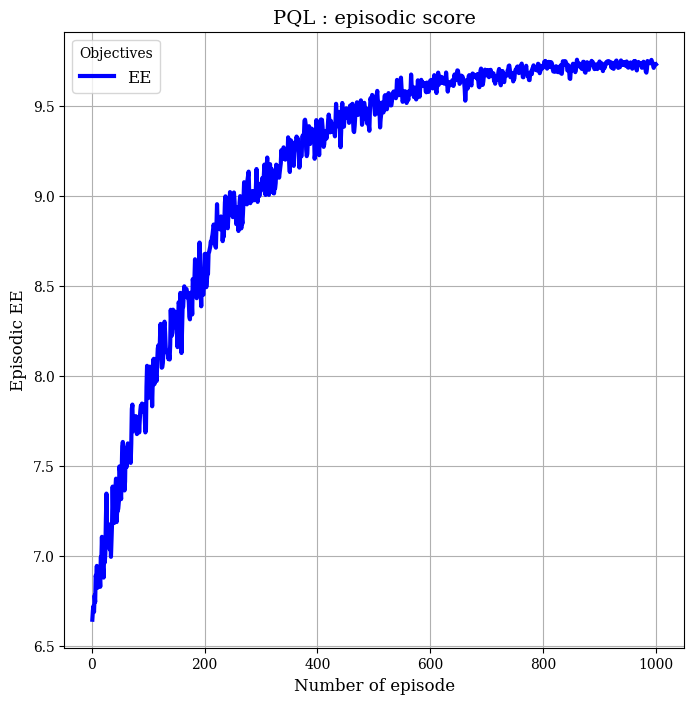

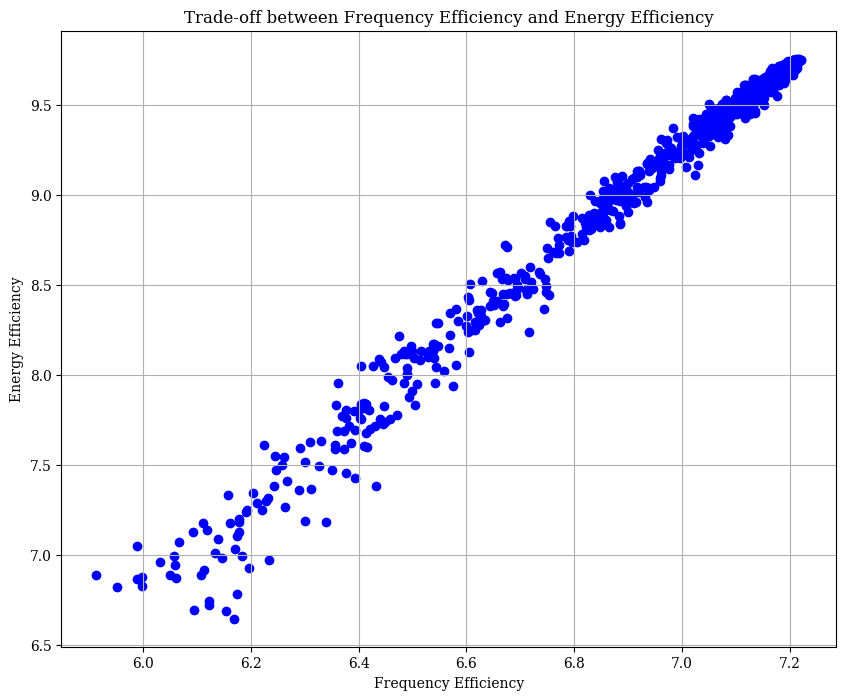

In [13]:
class ParetoQLearning:
  def __init__(self, state_size, action_size, hidden_size, pql_batch_size, pql_learning_rate, pql_buffer_size, pql_gamma, optimizer_type, l2_reg=1e-5):
    self.state_size = state_size
    self.action_size = action_size
    self.hidden_size = hidden_size
    self.lr = pql_learning_rate
    self.gamma = pql_gamma
    self.buffer_size = pql_buffer_size
    self.batch_size = pql_batch_size
    self.optimizer_type = optimizer_type
    self.l2_reg = l2_reg

    self.net = nn.Sequential(
        nn.Linear(self.state_size, self.hidden_size), nn.ReLU(),
        nn.Linear(self.hidden_size, self.hidden_size), nn.ReLU(),
        nn.Linear(self.hidden_size, self.action_size))

    if self.optimizer_type == "ADAM":
      self.optimizer = optim.Adam(self.net.parameters(), lr = pql_learning_rate)

    elif self.optimizer_type == "SGD":
      self.optimizer = optim.SGD(self.net.parameters(), lr = pql_learning_rate, momentum = 0.9)

    elif self.optimizer_type == "RMSProp":
      self.optimizer = optim.RMSprop(self.net.parameters(), lr = pql_learning_rate)

    elif self.optimizer_type == "Adagrad":
      self.optimizer = optim.Adagrad(self.net.parameters(), lr = pql_learning_rate)

    else:
      raise ValueError("Invalid optimizer type")

    self.replay_buffer = ReplayBuffer(pql_buffer_size)

  def select_action(self, state, epsilon):
    with torch.no_grad():
        values = self.net(torch.Tensor(state))
    q_values = values.cpu().detach().numpy()

    if np.random.rand() < epsilon:
        action = np.random.choice(len(q_values)) if len(q_values) > 0 else 0
    else:
        pareto_frontier = self.get_pareto_frontier(q_values)
        action = np.random.choice(pareto_frontier)

    return action

  def update(self, batch):
    if len(self.replay_buffer) < self.batch_size:
        return

    transitions = self.replay_buffer.sample(self.batch_size)
    batch = list(zip(*transitions))

    state = torch.Tensor(batch[0])
    action = torch.Tensor(batch[1]).long().unsqueeze(1)
    next_state = torch.Tensor(batch[2])
    reward = list(batch[3])
    done = batch[4]

    self.optimizer.zero_grad()
    q_values = self.net(state)

    next_q_values = self.net(next_state)
    next_pareto_frontier = self.get_pareto_frontier(next_q_values.cpu().detach().numpy())
    next_pareto_q_values = torch.gather(next_q_values, 1, torch.Tensor(next_pareto_frontier).long().unsqueeze(1).expand(-1, next_q_values.size(1)))

    td_error = torch.gather(q_values, 1, action) - (torch.Tensor(reward).unsqueeze(1) + self.gamma * next_pareto_q_values * (1 - torch.Tensor(done)).unsqueeze(1))
    loss = torch.mean(torch.abs(td_error))

    loss.backward()
    self.optimizer.step()

    return

  def get_pareto_frontier(self, q_values):
    pareto_frontier = []
    for i in range(len(q_values)):
      is_pareto_dominated = False
      for j in range(len(q_values)):
        if np.all(q_values[j] >= q_values[i]) and np.any(q_values[j] > q_values[i]):
          is_pareto_dominated = True
          break
      if not is_pareto_dominated:
        pareto_frontier.append(i)
    return pareto_frontier

  def save_PQL_checkpoint(self, filename):
    torch.save(self.net.state_dict(), filename)

  def load_PQL_checkpoint(self, filename):
    self.net.load_state_dict(torch.load(filename))

def load_PQL_agent(env, filename):

  state_size = env.MO_observation_space.shape[0]
  action_size = env.action_space.n
  hidden_size = 128

  agent = ParetoQLearning(state_size, action_size, hidden_size, pql_batch_size, pql_learning_rate, pql_buffer_size, pql_gamma, optimizer_types[0])
  agent.load_PQL_checkpoint(filename)

  return agent

def PQL_train(env, pql_max_train, batch_size, load_boolean):
  state_size = env.MO_observation_space.shape[0]
  action_size = env.action_space.n
  preference_size = env.preference_space.shape[0]
  hidden_size = 128

  train_episodes = []
  train_score_1 = []
  train_score_2 = []

  update_count = 0

  if load_boolean == True:
    agent = load_PQL_agent(env, filename = "PQL_checkpoint.pth.tar")
  else:
    agent = ParetoQLearning(state_size, action_size, hidden_size, pql_batch_size, pql_learning_rate, pql_buffer_size, pql_gamma, optimizer_types[0])

  replay_buffer = ReplayBuffer(buffer_size)

  TARGET_UPDATE = 10
  epsilon = 1.0
  epsilon_decay = 0.995
  min_epsilon = 0.01

  for n_epi in range(1, pql_max_train + 1):

    # Linear epsilon annealing from
    epsilon = max(epsilon * epsilon_decay, min_epsilon)

    done = False
    score = 0.0
    state = env.reset(objective = "multiple")

    while not done:
      # Select an action using epsilon-greedy exploration
      action = agent.select_action(state, epsilon)

      # Take the selected action and get the next state and reward
      next_state, reward, done, info = env.step(action, objective = "multiple")
      done_mask = 0.0 if done else 1.0

      # Add the transition to the replay buffer
      replay_buffer.push(state, action, next_state, reward, done_mask)

      # Update the state and episode reward
      state = next_state

      if done:
        break

      score += reward

    train_episodes.append(n_epi)
    train_score_1.append(score[0] / action_size)
    train_score_2.append(score[1] / action_size)

    print("[PQL] Episode [{}] \t\t vector scores [{}, {}]".format(n_epi, (score[0] / action_size), (score[1] / action_size)))

    if len(replay_buffer) > 5000:
      batch = replay_buffer.sample(pql_batch_size)
      agent.update(replay_buffer.sample(pql_batch_size))
      update_count += 1

    if n_epi % save_interval == 0:
      agent.save_PQL_checkpoint(filename = "PQL_checkpoint.pth.tar")

  # PLOT THE SOCRE ACCORDING TO THE EPISODE
  filter_objective1 = savgol_filter(train_score_1, 5,3)
  filter_objective2 = savgol_filter(train_score_2, 5,3)

  # Only plotting of the SE performance
  plt.figure(figsize=(8,8))
  plt.plot(train_episodes, filter_objective1,'g-', linewidth = 3)
  plt.xlabel('Number of episode', fontsize = 12)
  plt.ylabel('Episodic SE', fontsize = 12)
  plt.title('PQL : episodic score', fontsize = 14)
  plt.axis
  plt.grid(True)
  plt.legend(['SE'], fontsize = 12, frameon=True, title = "Objectives")
  plt.show()

  # Only plotting of the EE performance
  plt.figure(figsize=(8,8))
  plt.plot(train_episodes, filter_objective2, 'b-', linewidth = 3)
  plt.xlabel('Number of episode', fontsize = 12)
  plt.ylabel('Episodic EE', fontsize = 12)
  plt.title('PQL : episodic score', fontsize = 14)
  plt.axis
  plt.grid(True)
  plt.legend(['EE'], fontsize = 12, frameon=True, title = "Objectives")
  plt.show()

  plt.figure(figsize=(10, 8))
  plt.scatter(filter_objective1, filter_objective2, c='blue', marker='o')
  plt.title('Trade-off between Frequency Efficiency and Energy Efficiency')
  plt.xlabel('Frequency Efficiency')
  plt.ylabel('Energy Efficiency')
  plt.grid(True)
  plt.show()

  # EXPORT POLICY GRAIDENT-METHOD RESULT (EPISODE | SCORE)
  dataframe = pd.DataFrame({'Episode' : train_episodes, 'SE' : filter_objective1, 'EE' : filter_objective2})
  dataframe.to_csv('PQL.csv', index = False, header=['Episode', 'SE', 'EE'])

  return

def PQL_test(env):

  PQL_action_list = []
  loaded_agent = load_PQL_agent(env, filename = "PQL_checkpoint.pth.tar")

  for n_epi in range(1, max_test + 1):
    done = False
    score = 0.0
    state = env.reset(objective = "multiple")

    while not done:
      with torch.no_grad():
        values = loaded_agent.net(torch.Tensor(state))
      action = np.argmax(values.cpu().detach().numpy())
      next_state, reward, done, info = env.step(action, objective = "multiple")
      score += reward
      state = next_state

      PQL_action_list.append(action)
  PQL_action = env.Get_rho(PQL_action_list)
  env.close()

  return PQL_action

#######################################################################################################################################
#######################################################################################################################################
if __name__ == '__main__':
  try:
    os.mkdir('./agents',)
  except FileExistsError:
    pass

  # EXTRACT ACTION, STATE FROM MASSIVE MIMO ENV
  env = M_MIMOEnv(N= 16, M = 10, K = 5, precoding='RZF', Pmin = 5, Pmax = 38, Q = 300)
  state_space = env.MO_observation_space.shape[0]
  action_space = env.action_space.n
  env.close()
  load_boolean = False
  agent = PQL_train(env, pql_max_train, pql_batch_size, load_boolean)
#######################################################################################################################################
#######################################################################################################################################